In [1]:
URL = 'http://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Binance_BTCUSDT_d.csv')

('Binance_BTCUSDT_d.csv', <http.client.HTTPMessage at 0x1a9600791c8>)

In [3]:
import pandas as pd

In [26]:
data = pd.read_csv('Binance_BTCUSDT_d.csv',skiprows=1,index_col='date',parse_dates=True,usecols=['date','open','close','high','low'])
data.head()

,open,high,low,close
date,,,,
2021-02-02,33517.09,33649.90,33418.00,33612.24
2021-02-01,33092.97,34717.27,32296.16,33526.37
2021-01-31,34262.89,34342.69,32171.67,33092.98
2021-01-30,34246.28,34933.00,32825.00,34262.88
2021-01-29,33368.18,38531.90,31915.40,34252.20


In [47]:
data.tail()

,open,high,low,close
date,,,,
2017-08-21,4086.29,4119.62,3911.79,4016.00
2017-08-20,4139.98,4211.08,4032.62,4086.29
2017-08-19,4108.37,4184.69,3850.00,4139.98
2017-08-18,4285.08,4371.52,3938.77,4108.37
2017-08-17,4469.93,4485.39,4200.74,4285.08


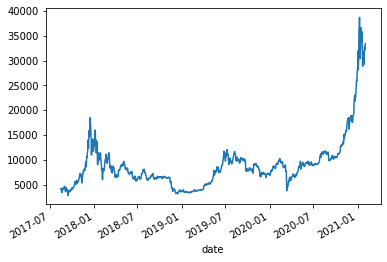

In [39]:
data['low'].plot()

In [31]:
# The following code is from https://towardsdatascience.com/what-moves-bitcoin-c06f7b46d2e4
# with my user tokens

import OpenBlender

In [40]:
import json

In [42]:
action = 'API_createTextVectorizer'

vectorizer_parameters = {
    'token' : '60195cdc951629710cbdba95f8RXtKeDpukuavetT1zyFlCtr86NKI',
    'name' : 'News Headlines',
    'anchor':{'id_dataset' : '5d5ab15c9516296e5749de7a', 'include_features' : ['title']},
    'ngram_range' : {'min' : 1, 'max' : 2},
    'language' : 'en',
    'remove_stop_words' : 'on',
    'min_count_limit' : 2
}

In [48]:
parameters = { 
   'token':'60195cdc951629710cbdba95f8RXtKeDpukuavetT1zyFlCtr86NKI',
   'id_dataset':'5d5ab15c9516296e5749de7a',
   'target_threshold' : {'feature':'change','success_thr_over':0},
   'lag_target_feature' : {'feature':'change_over_0', 'periods':1},
   'blends':[{'id_blend':'5de020789516293a833f5818',
               'blend_type' : 'text_ts',
               'restriction' : 'predictive',
               'blend_class' : 'closest_observation', 
               'specifications':{'time_interval_size' : 3600*12 }}],
   'date_filter':{'start_date':'2017-08-20T16:59:35.825Z',
                   'end_date':'2021-02-2T17:59:35.825Z'},
   'drop_non_numeric' : 1
}

In [49]:
def pullObservationsToDF(parameters):
    action = 'API_getObservationsFromDataset'
    df = pd.read_json(json.dumps(OpenBlender.call(action,parameters)['sample'])              ,convert_dates=False,convert_axes=False).sort_values('timestamp', ascending=False)
    df.reset_index(drop=True, inplace=True)
    return df
df = pullObservationsToDF(parameters)

Task ID: '60197e000895fafb4a9d8d4b'.
Total estimated consumption: 26813.59 processing units.
Task confirmed. Starting download..
0.13 %
0.25 %
0.38 %
0.5 %
0.63 %
0.75 %
0.88 %
1.01 %
1.13 %
1.26 %
1.38 %
1.51 %
1.63 %
1.76 %
1.88 %
2.01 %
2.14 %
2.26 %
2.39 %
2.51 %
2.64 %
2.76 %
2.89 %
3.02 %
3.14 %
3.27 %
3.39 %
3.52 %
3.64 %
3.77 %
3.89 %
4.02 %
4.15 %
4.27 %
4.4 %
4.52 %
4.65 %
4.77 %
4.9 %
5.03 %
5.15 %
5.28 %
5.4 %
5.53 %
5.65 %
5.78 %
5.9 %
6.03 %
6.16 %
6.28 %
6.41 %
6.53 %
6.66 %
6.78 %
6.91 %
7.04 %
7.16 %
7.29 %
7.41 %
7.54 %
7.66 %
7.79 %
7.91 %
8.04 %
8.17 %
8.29 %
8.42 %
8.54 %
8.67 %
8.79 %
8.92 %
9.05 %
9.17 %
9.3 %
9.42 %
9.55 %
9.67 %
9.8 %
9.92 %
10.05 %
10.18 %
10.3 %
10.43 %
10.55 %
10.68 %
10.8 %
10.93 %
11.06 %
11.18 %
11.31 %
11.43 %
11.56 %
11.68 %
11.81 %
11.93 %
12.06 %
12.19 %
12.31 %
12.44 %
12.56 %
12.69 %
12.81 %
12.94 %
13.07 %
13.19 %
13.32 %
13.44 %
13.57 %
13.69 %
13.82 %
13.94 %
14.07 %
14.2 %
14.32 %
14.45 %
14.57 %
14.7 %
14.82 %
14.95 %
15.08 %
1